In [1]:
from ogb.nodeproppred import NodePropPredDataset
from torch_geometric.data import Data
from torch_geometric.utils import from_scipy_sparse_matrix
import torch

In [2]:
dataset = NodePropPredDataset(name="ogbn-arxiv")

/home/marcovinha/instruct_glm_llama_3_3/.venv/lib/python3.10/site-packages/ogb/nodeproppred/dataset.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_dict = torch.

In [3]:
graph, labels = dataset[0]

In [4]:
graph["node_feat"]

array([[-0.057943, -0.05253 , -0.072603, ...,  0.173364, -0.172796,
        -0.140059],
       [-0.1245  , -0.070665, -0.325202, ...,  0.068524, -0.372111,
        -0.301036],
       [-0.080242, -0.023328, -0.183787, ...,  0.109919,  0.117589,
        -0.139883],
       ...,
       [-0.22053 , -0.036568, -0.402199, ...,  0.11336 , -0.161393,
        -0.145171],
       [-0.138236,  0.040885, -0.251811, ..., -0.08929 , -0.041253,
        -0.376132],
       [-0.029875,  0.268417, -0.161124, ...,  0.120807,  0.077647,
        -0.091018]], dtype=float32)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from umap.umap_ import UMAP


def reduce_dimensions(vectors):
    reducer = UMAP()
    reducer.fit(vectors)
    vectors = reducer.transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]

    return x_vals, y_vals


def plot_embeddings(x_vals, y_vals, labels):
    random.seed(0)
    plt.figure(figsize=(12, 12))

    # Use a scatter plot with a colormap based on labels
    scatter = plt.scatter(
        x_vals,
        y_vals,
        c=labels,
        cmap='tab20',  # Use a categorical colormap suitable for up to 20 categories
        s=10,          # Adjust size of points if needed
        alpha=0.8      # Adjust transparency for better visibility
    )

    # Add a colorbar to show the mapping of colors to classes
    plt.colorbar(scatter, ticks=np.arange(0, 40, step=1), label="Classes")
    plt.title("2D Embedding Visualization with Class Colors")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


/home/marcovinha/instruct_glm_llama_3_3/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
x, y = reduce_dimensions(graph["node_feat"])


/home/marcovinha/instruct_glm_llama_3_3/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/marcovinha/instruct_glm_llama_3_3/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


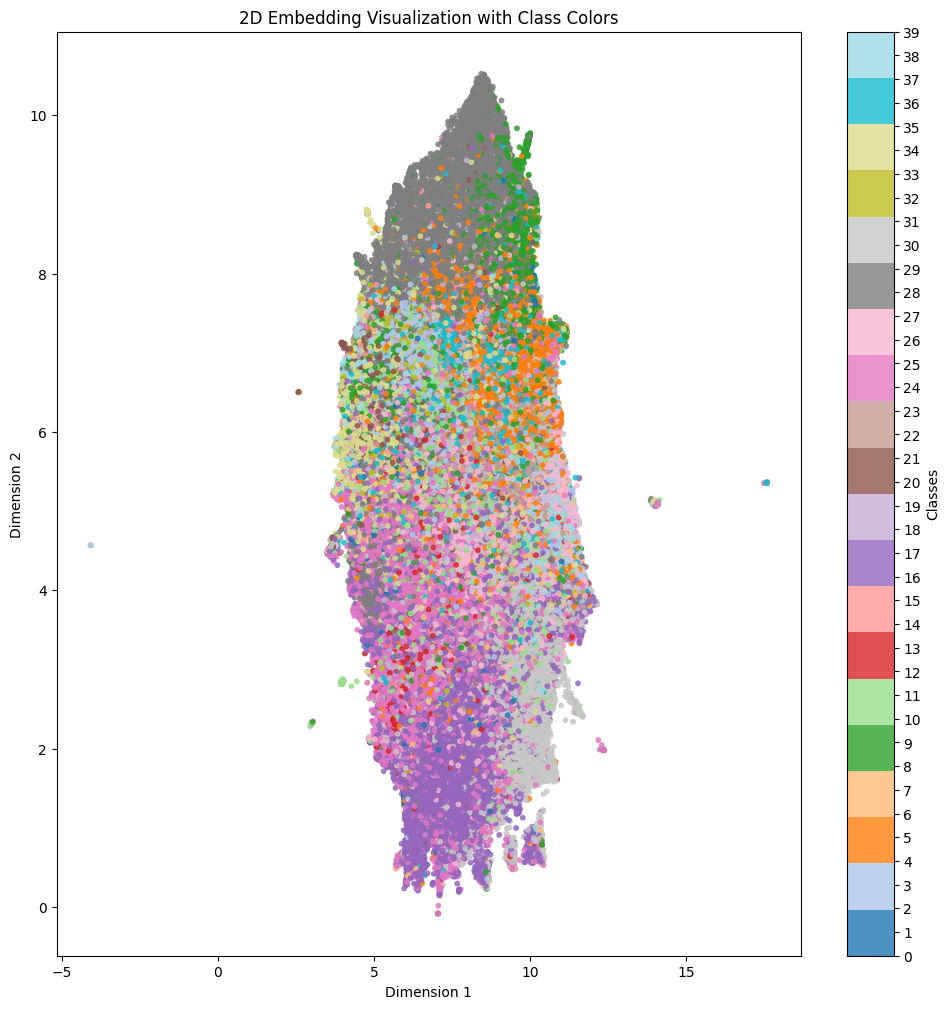

In [7]:
plot_embeddings(x, y, labels)